In [1]:
import PIL
from PIL import Image
import glob
from glob import glob
import cv2
import numpy as np
import tifffile
from tifffile import TiffFile
import matplotlib.pyplot as plt
import rasterio



# PATH

In [2]:
DATASET_ROOT='/home/syo/work/2024_IEEE_GRSS/dataset/'
TRACK1_ROOT='/home/syo/work/2024_IEEE_GRSS/dataset/Track1/'
TRACK2_ROOT='/home/syo/work/2024_IEEE_GRSS/dataset/Track2/'

In [3]:
images_list=sorted([i for i in glob(TRACK1_ROOT+'train/images/'+'*')])
label_list=sorted([i for i in glob(TRACK1_ROOT+'train/labels/'+'*')])

In [4]:
len(images_list)

1631

In [5]:
sample=images_list[0]
data=np.fromfile(sample,int)
#print(data.shape)
with TiffFile(sample) as tif:
    img=tif.asarray()
    print(img.shape)
    

(512, 512, 6)


In [6]:
sample

'/home/syo/work/2024_IEEE_GRSS/dataset/Track1/train/images/0.tif'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


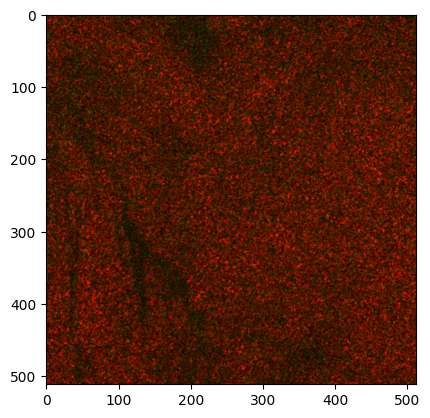

In [7]:

plt.imshow(img[:,:,0:3])

In [8]:
def display_sar(sar_data,num):
    sar_channels = [sar_data.read(i) for i in range(1, num+1)]
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(sar_channels[i], cmap='gray')
        ax.set_title(f'Channel {i + 1}')
        ax.axis('off')
    plt.show()

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(512, 512)


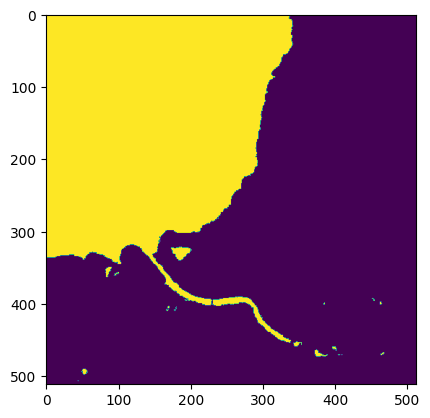

In [15]:
sample_map=np.array(Image.open(label_list[3]))
print(sample_map)
plt.imshow(sample_map)
print(sample_map.shape)

/home/syo/opt/mambaforge/envs/kaggle/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


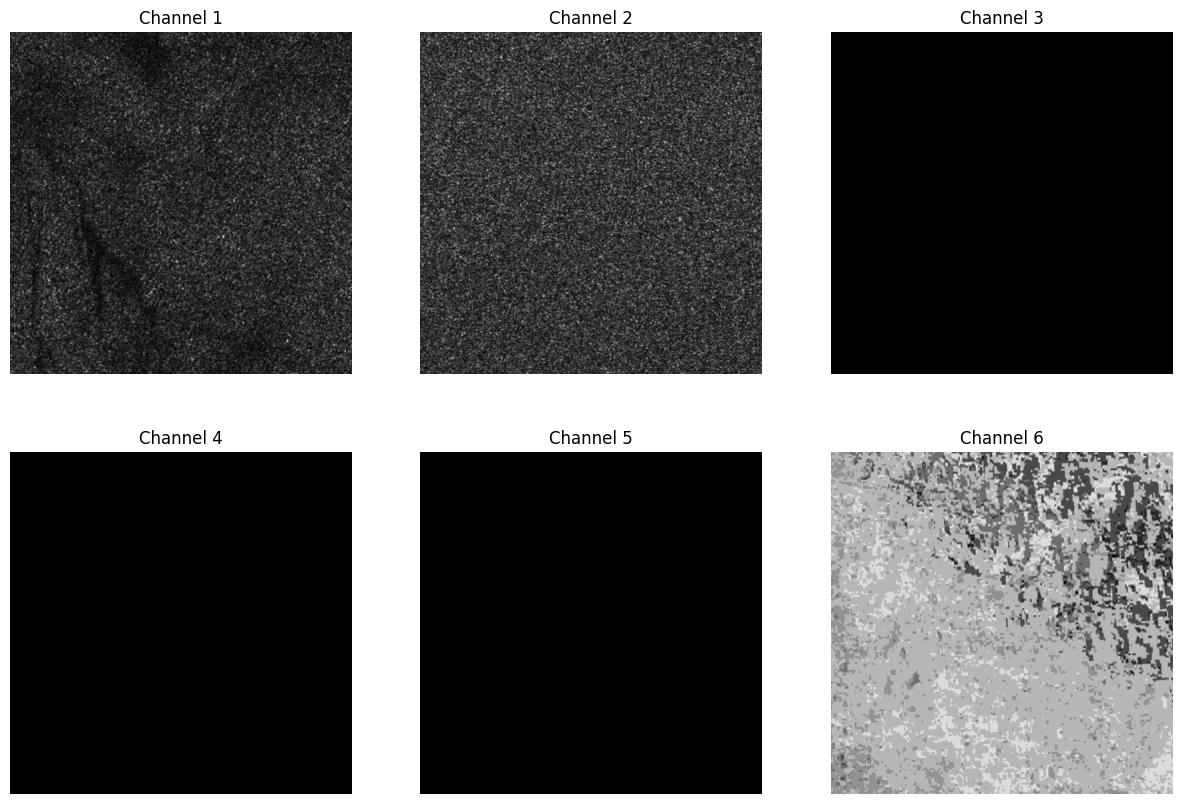

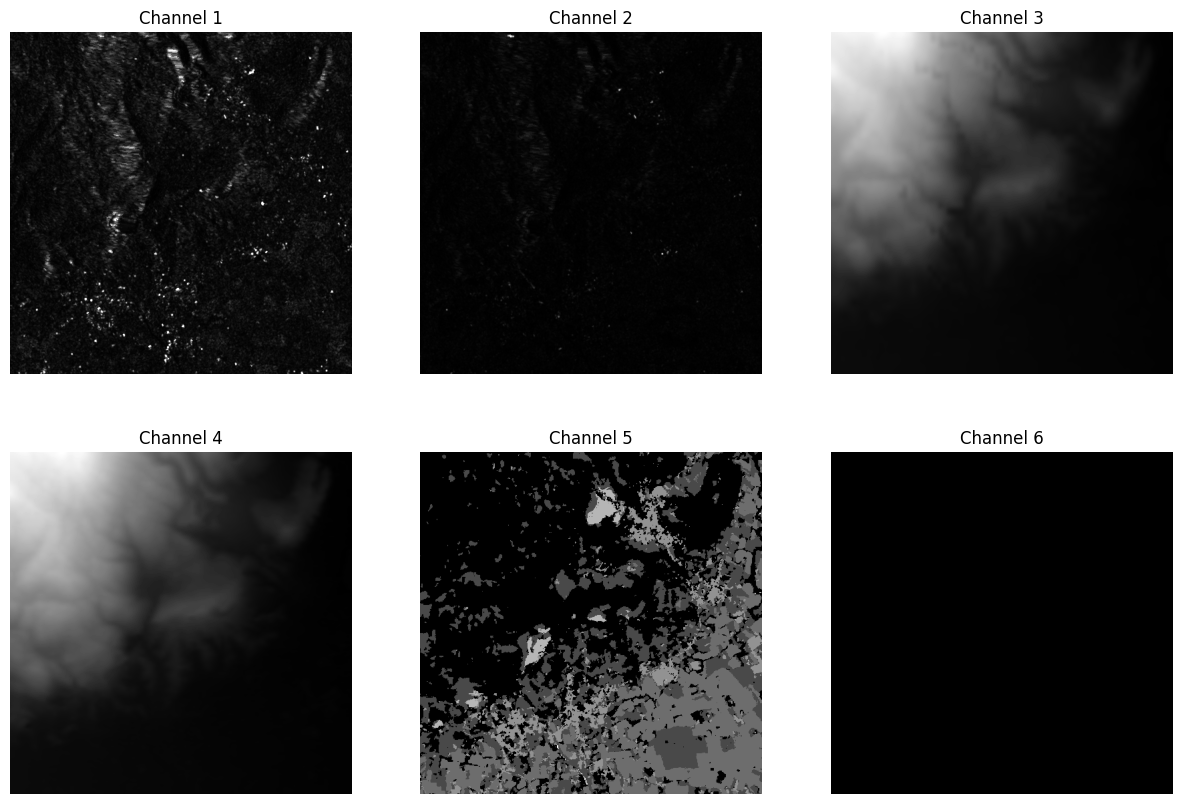

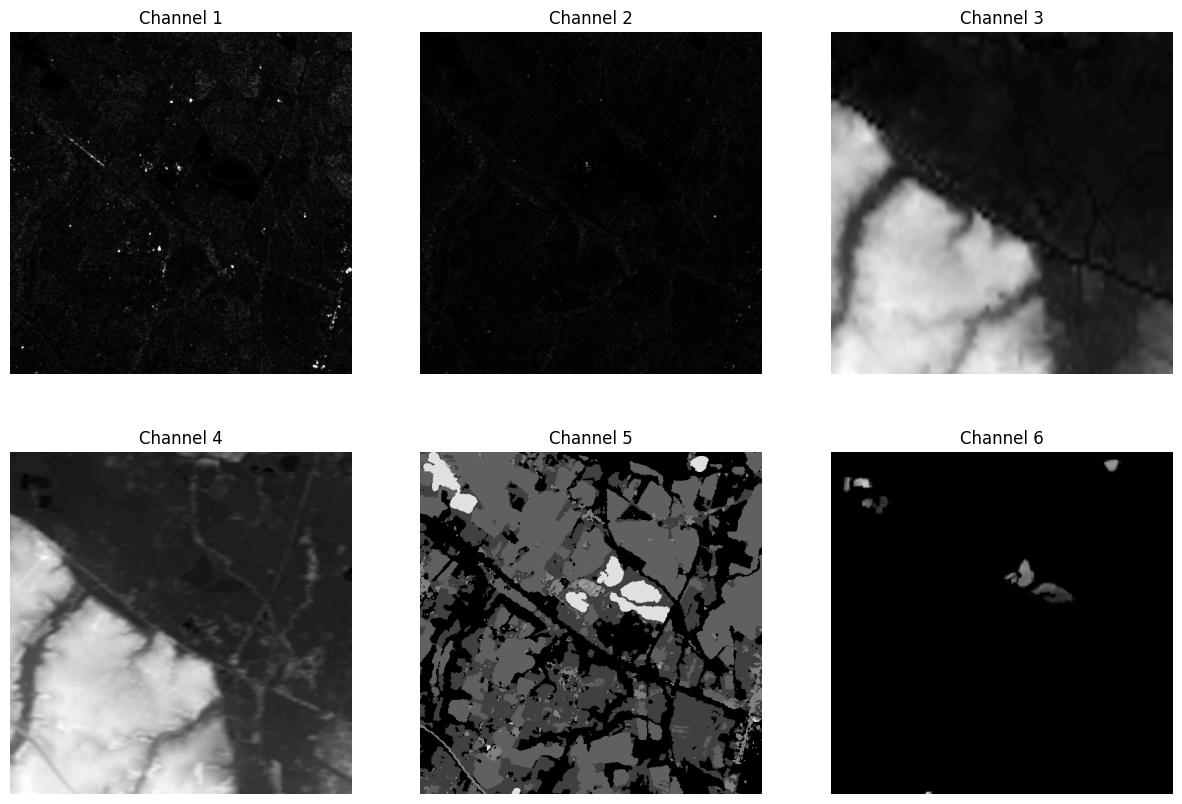

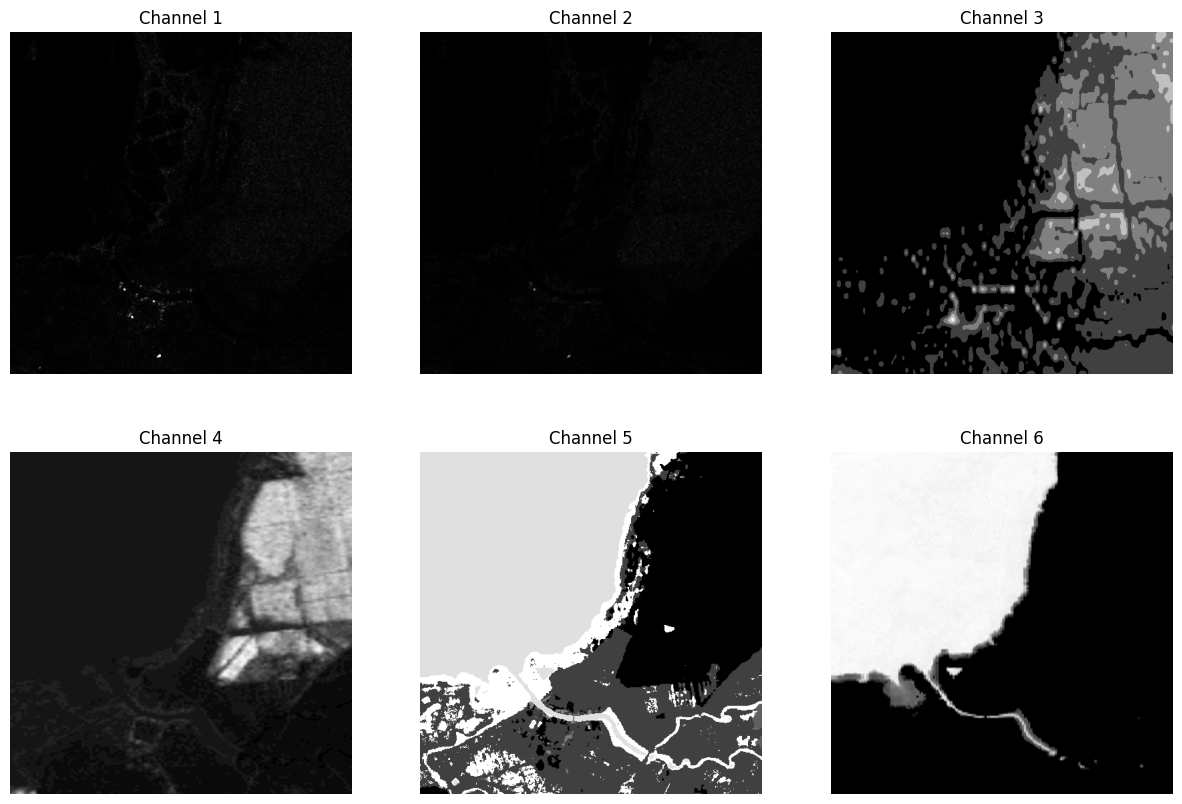

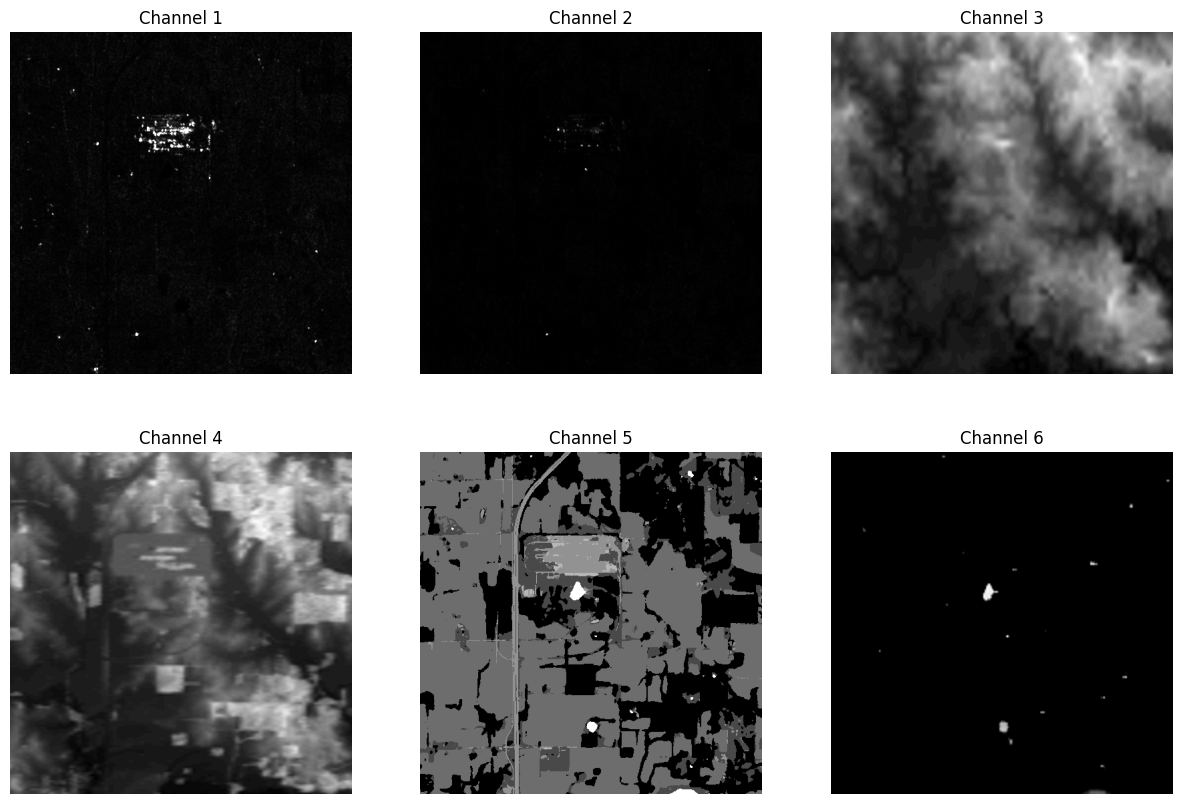

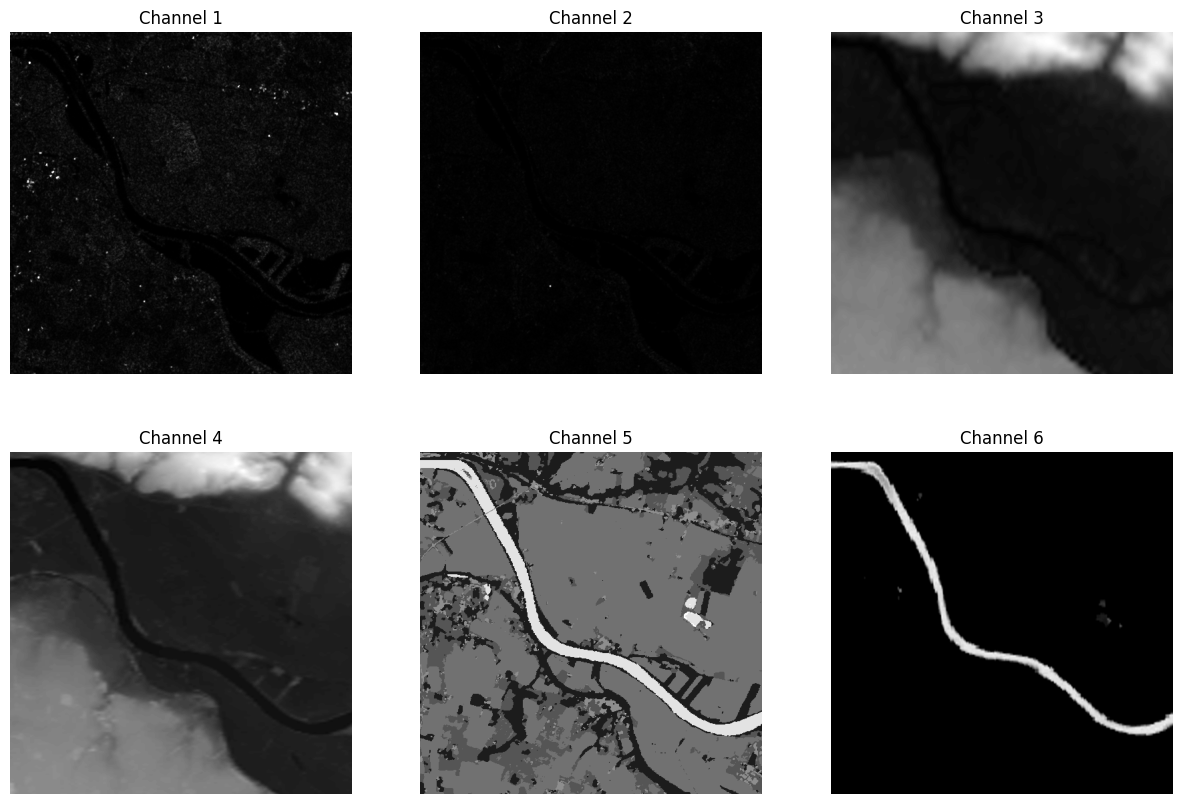

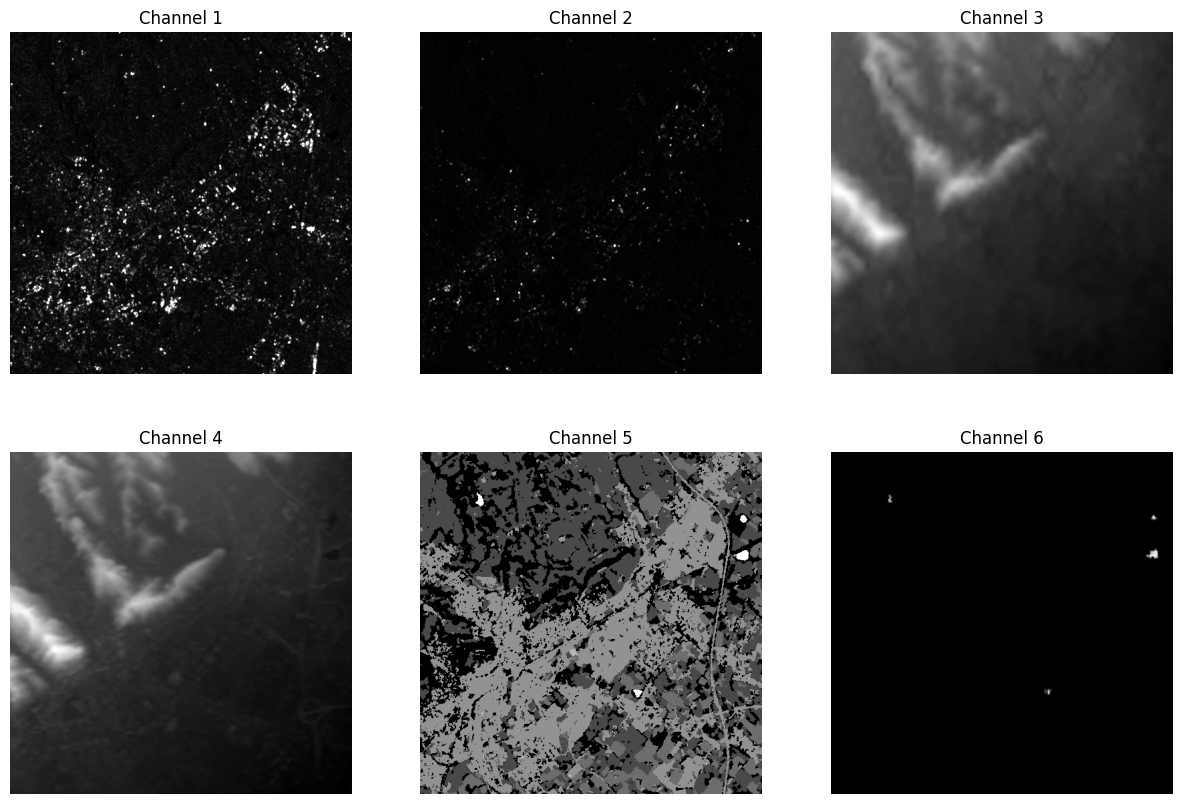

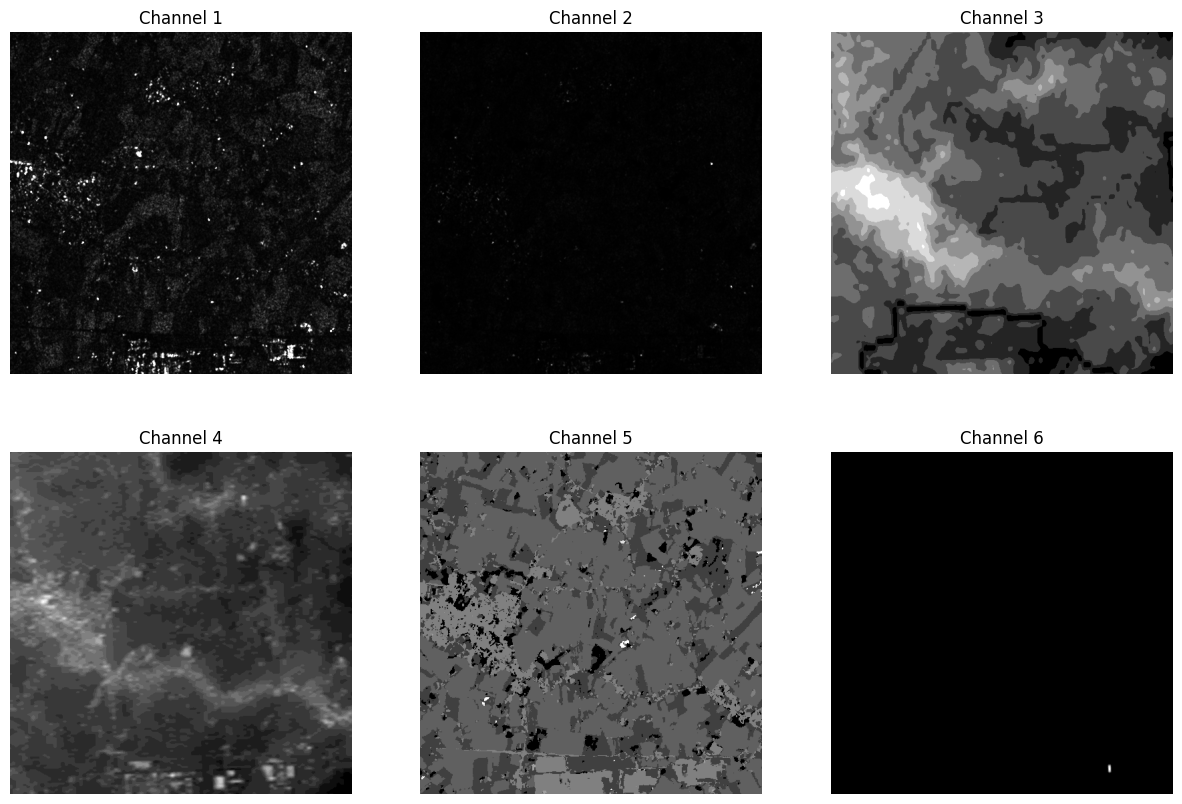

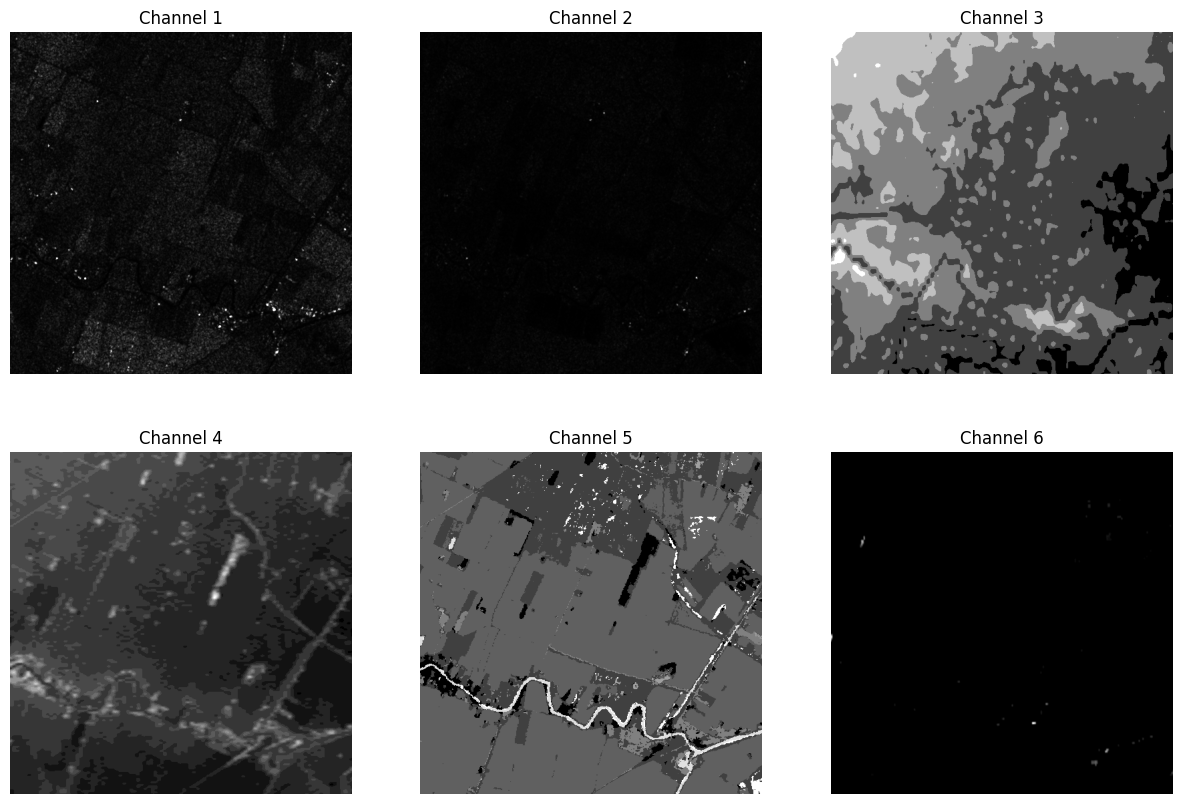

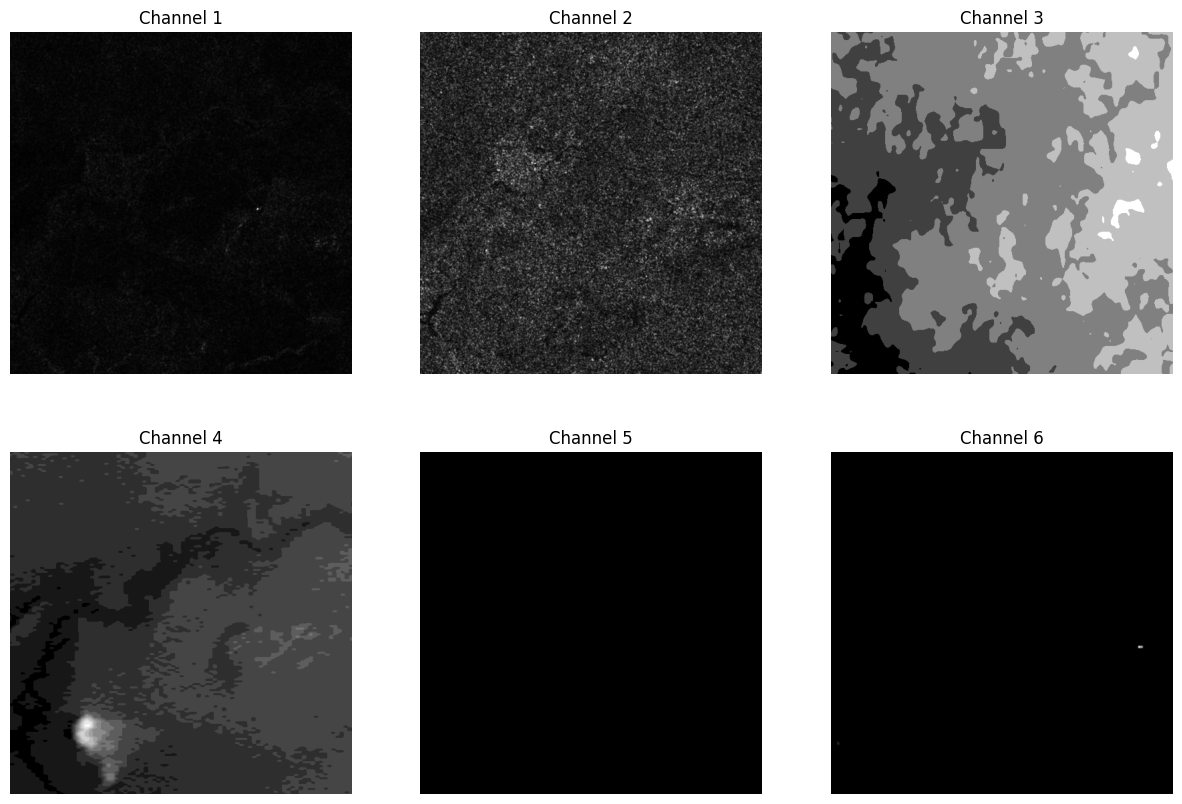

In [10]:
for i in images_list[:10]:
    sar_data = rasterio.open(i,dtype=rasterio.uint8)
    display_sar(sar_data=sar_data,num=6)

In [11]:
from dataset import SARDataset

/home/syo/opt/mambaforge/envs/kaggle/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
train_dataset=SARDataset(
       image_root="/home/syo/work/2024_IEEE_GRSS/dataset/Track1/train/images/",
       label_root="/home/syo/work/2024_IEEE_GRSS/dataset/Track1/train/labels/",
       mode='train'
   )
val_dataset=SARDataset(
       image_root="/home/syo/work/2024_IEEE_GRSS/dataset/Track1/train/images/",
       label_root="/home/syo/work/2024_IEEE_GRSS/dataset/Track1/train/labels/",
       mode='val'
   )

In [32]:
n_max=[]
n_min=[]
for data in train_dataset:
    d=data['data']
    c1=d[0,:,:]
    n_max.append(c1.max())
    n_min.append(c1.min())

    #negative_indices = np.where(d < 0)
    #negative_count = len(negative_indices[0])
    #negative_values = d[negative_indices]
    #print(negative_count)
    #print(negative_values)
n_max=np.array(n_max)
n_min=np.array(n_min)
print(sorted(n_max))
print(sorted(n_min))


/home/syo/opt/mambaforge/envs/kaggle/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[454.0, 614.0, 626.0, 3494.0, 3574.0, 3675.0, 3702.0, 4047.0, 4049.0, 4049.0, 4143.0, 4143.0, 4289.0, 4306.0, 4727.0, 4856.0, 4898.0, 4983.0, 5260.0, 5458.0, 6251.0, 6264.0, 7762.0, 7842.0, 9740.0, 16221.0, 16435.0, 18523.0, 23609.0, 25091.0, 25652.0, 29141.0, 32404.0, 32645.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 32765.0, 3

In [31]:
submit_path='./submit/'
submaks_list = sorted(list(glob(submit_path+'*')))

./submit/1631.png
[[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 

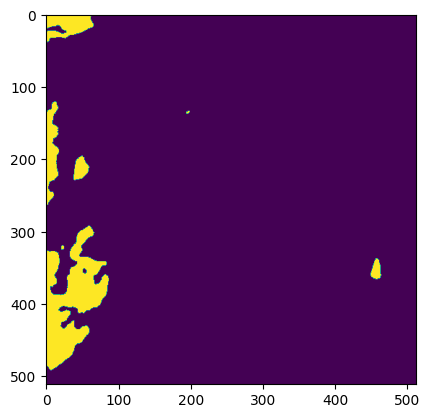

In [34]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

sample_map=np.array(Image.open(submaks_list[2]))
print(submaks_list[0])
print(sample_map)
plt.imshow(sample_map)
print(sample_map.shape)